In [51]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [53]:
import seaborn as sns

In [54]:
import matplotlib.pyplot as plt

In [55]:
import numpy as np


In [56]:
import pandas as pd

In [57]:
# Add the function definition here
def plot_confusion_matrix(y_true, y_pred, title):
    try:
        # Create confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        
        # Get unique classes
        unique_classes = np.unique(np.concatenate([y_true, y_pred]))
        n_classes = len(unique_classes)
        
        # Create labels based on actual classes present
        labels = ['Normal' if c == 0 else 'Fraud' for c in unique_classes]
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, 
                   annot=True, 
                   fmt='d', 
                   cmap='Blues',
                   xticklabels=labels,
                   yticklabels=labels)
        plt.title(title)
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
        plt.close()
        
    except Exception as e:
        print(f"Error in plotting confusion matrix: {e}")
        print(f"Number of unique classes in true labels: {len(np.unique(y_true))}")
        print(f"Number of unique classes in predicted labels: {len(np.unique(y_pred))}")
        print(f"Class distribution in true labels: \n{pd.Series(y_true).value_counts()}")
        print(f"Class distribution in predicted labels: \n{pd.Series(y_pred).value_counts()}")


In [58]:
data = pd.read_csv("creditcard.csv").head(200000)




In [59]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [60]:
pd.options.display.max_columns = None

In [61]:

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [62]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
199995,133235.0,-0.789228,1.471198,-1.291998,-0.686221,0.309355,-0.323149,0.062620,0.938297,-0.190176,-0.222467,-0.125445,0.044864,-1.280571,1.427368,-0.029028,0.142300,-0.448853,0.984129,0.410262,-0.159075,0.428462,1.177949,-0.026305,0.215007,-0.704790,-0.226072,0.349801,0.246827,0.99,0
199996,133236.0,-0.083310,1.950405,0.556845,4.022670,0.503287,0.510877,2.464482,-1.327936,-0.570295,4.111719,-0.489082,-1.184422,0.270277,-0.881265,0.975577,-0.654694,-0.606183,0.049178,0.749124,0.967927,-0.072613,1.374763,-0.194896,0.072835,-1.159745,0.267147,0.283539,-0.587234,151.64,0
199997,133236.0,-1.943282,0.898549,-0.402690,-0.179340,0.301361,-0.134193,1.288226,-0.478686,0.308260,1.247246,0.559988,0.708402,0.434591,-0.180826,-0.535176,-0.441453,-0.456814,-0.119665,1.712662,-0.319767,-0.341853,-0.157110,-0.050649,-0.425485,-0.590081,0.282905,-0.730029,-0.155896,108.21,0
199998,133236.0,-1.103962,0.940976,1.652220,-0.365992,-0.299453,0.489269,-0.106126,0.832525,0.349337,-1.041893,-0.207799,0.687696,-0.885028,0.100086,-1.403757,-0.304444,0.044446,0.215269,1.296146,-0.057028,-0.357995,-0.842373,-0.254363,-0.512391,0.456296,-0.414252,0.202450,0.054214,1.00,0
199999,133236.0,2.320998,-0.496412,-2.593376,-0.962050,0.323330,-1.454052,0.329897,-0.520266,-0.860366,0.971499,-0.962375,-1.432254,-1.432882,0.693318,-0.300607,0.102297,0.643325,-1.638375,0.723198,-0.156616,0.452442,1.325093,-0.168678,0.738673,0.734526,0.278194,-0.104142,-0.091720,1.79,0


In [63]:
data.shape

(200000, 31)

In [64]:
print("Number of columns: {}".format(data.shape[1]))
print("Number of rows: {}".format(data.shape[0]))

Number of columns: 31
Number of rows: 200000


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    200000 non-null  float64
 1   V1      200000 non-null  float64
 2   V2      200000 non-null  float64
 3   V3      200000 non-null  float64
 4   V4      200000 non-null  float64
 5   V5      200000 non-null  float64
 6   V6      200000 non-null  float64
 7   V7      200000 non-null  float64
 8   V8      200000 non-null  float64
 9   V9      200000 non-null  float64
 10  V10     200000 non-null  float64
 11  V11     200000 non-null  float64
 12  V12     200000 non-null  float64
 13  V13     200000 non-null  float64
 14  V14     200000 non-null  float64
 15  V15     200000 non-null  float64
 16  V16     200000 non-null  float64
 17  V17     200000 non-null  float64
 18  V18     200000 non-null  float64
 19  V19     200000 non-null  float64
 20  V20     200000 non-null  float64
 21  V21     20

In [66]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [69]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.240611,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.350066,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.161380,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.135605,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.079511,0


In [70]:
data = data.drop(['Time'], axis =1)

In [71]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.240611,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.350066,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.161380,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.135605,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.079511,0


In [72]:
data.duplicated().any()

np.True_

In [73]:
data = data.drop_duplicates()

In [74]:
data.shape

(194205, 30)

In [75]:
data['Class'].value_counts()

Class
0    193838
1       367
Name: count, dtype: int64

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

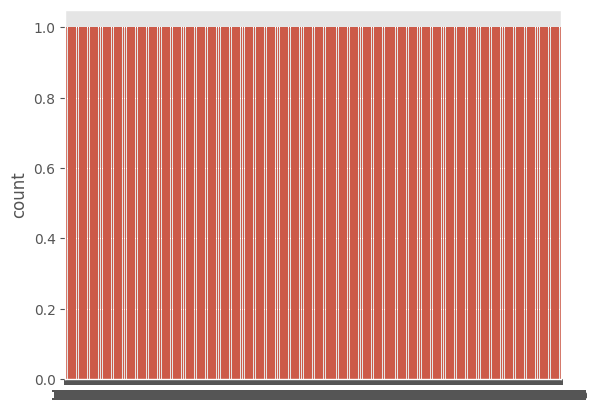

In [77]:
sns.countplot(data['Class'])
plt.show()

In [78]:
X = data.drop('Class', axis = 1)
y=data['Class']

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [81]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


==========Logistic Regression===========

 Accuaracy: 0.998918668417394

 Precision: 0.75

 Recall: 0.5735294117647058

 F1 Score: 0.65


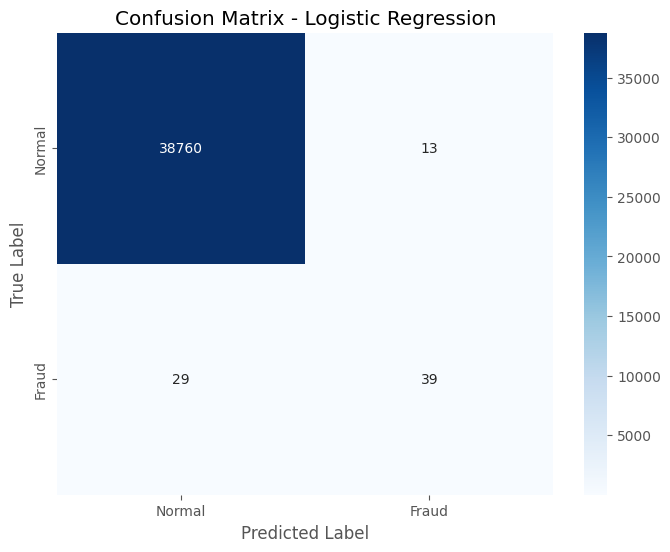


==========Random Forest Classifier===========

 Accuaracy: 0.9993306042583867

 Precision: 0.85

 Recall: 0.75

 F1 Score: 0.796875


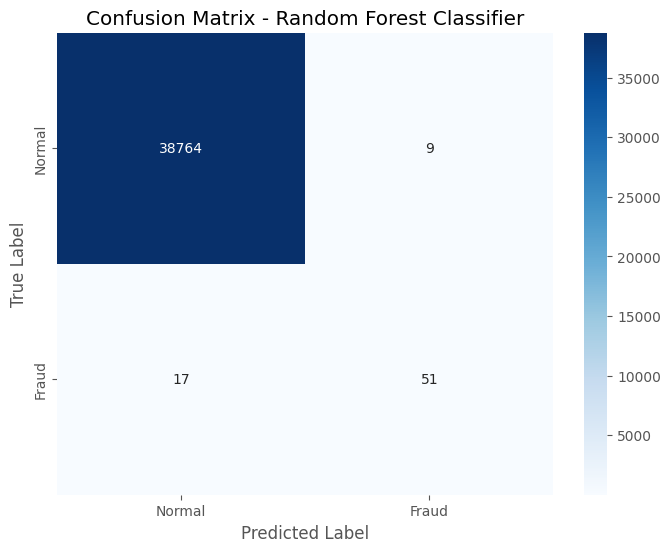


==========Decision Tree Classifier===========

 Accuaracy: 0.9991246363378904

 Precision: 0.7297297297297297

 Recall: 0.7941176470588235

 F1 Score: 0.7605633802816901


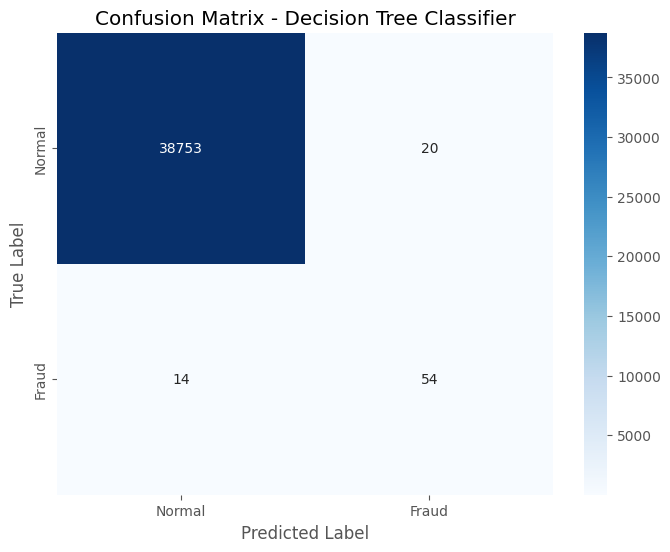

In [82]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier()
    
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")

    # Adding this code for confusion matrix
    plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix - {name}')

In [83]:
# Undersampling

In [84]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [85]:
normal.shape

(193838, 30)

In [86]:
fraud.shape

(367, 30)

In [87]:
normal_sample = normal.sample(n=473)

In [88]:
normal_sample.shape

(473, 30)

In [89]:
new_data = pd.concat([normal_sample,fraud], ignore_index=True)

In [90]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.362952,0.599986,0.338645,-0.138673,0.893736,-0.252891,0.079734,0.524613,-0.703741,-0.434190,0.296032,0.667892,0.961824,-0.167334,0.239169,1.069664,-0.606688,0.761271,0.746328,-0.027326,-0.283197,-0.715893,0.502854,-1.017143,0.176715,0.150366,0.078906,-0.063150,-0.353684,0
1,-0.895442,1.400932,1.044456,2.494620,0.505990,0.759265,0.170815,0.598478,-1.980943,0.736761,0.217902,0.714933,1.689544,0.434128,0.499871,0.592129,-0.604341,0.830861,1.473962,0.450953,0.035666,-0.031900,-0.142709,-0.820396,-0.035991,0.180691,0.246475,0.078926,-0.192678,0
2,1.105706,-0.215495,0.844194,0.357322,-0.978079,-0.882986,-0.143186,-0.216069,0.387571,-0.313703,0.026224,1.228906,1.493498,-0.406607,0.290054,-0.026655,-0.099233,-0.722503,-0.033276,0.140176,0.005812,0.080506,-0.029169,0.833225,0.248547,0.982121,-0.059509,0.025974,-0.079471,0
3,-1.321708,1.104850,1.249601,0.690263,0.474457,-0.750513,1.444193,-0.989280,0.559959,1.697343,-0.077435,-0.195788,0.316270,-0.696213,1.186432,-0.636892,-0.589165,-0.105047,0.399943,0.297972,-0.135460,0.561235,-0.210284,0.415876,-0.171097,-0.434751,-0.365414,-0.171085,-0.171854,0
4,1.041829,-0.611325,1.627658,1.541144,-1.173333,1.122347,-1.165485,0.391397,1.916110,-0.490527,-2.157877,0.791856,0.542395,-1.368274,-1.411892,-0.205075,-0.078298,0.274080,0.382687,0.003210,0.065414,0.648459,-0.315000,-0.375033,0.700062,-0.069554,0.117267,0.042876,-0.122286,0


In [91]:
new_data['Class'].value_counts()

Class
0    473
1    367
Name: count, dtype: int64

In [92]:
X = new_data.drop('Class', axis = 1)
y= new_data['Class']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


==========Logistic Regression===========

 Accuaracy: 0.9523809523809523

 Precision: 0.9696969696969697

 Recall: 0.9142857142857143

 F1 Score: 0.9411764705882353


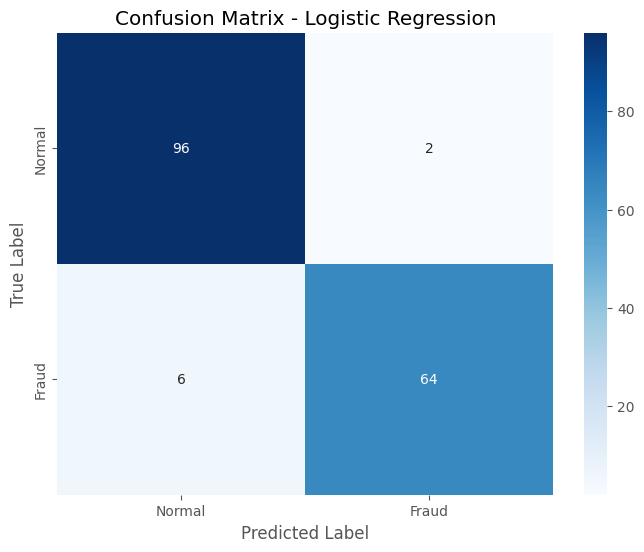


==========Random Forest Classifier===========

 Accuaracy: 0.9523809523809523

 Precision: 1.0

 Recall: 0.8857142857142857

 F1 Score: 0.9393939393939394


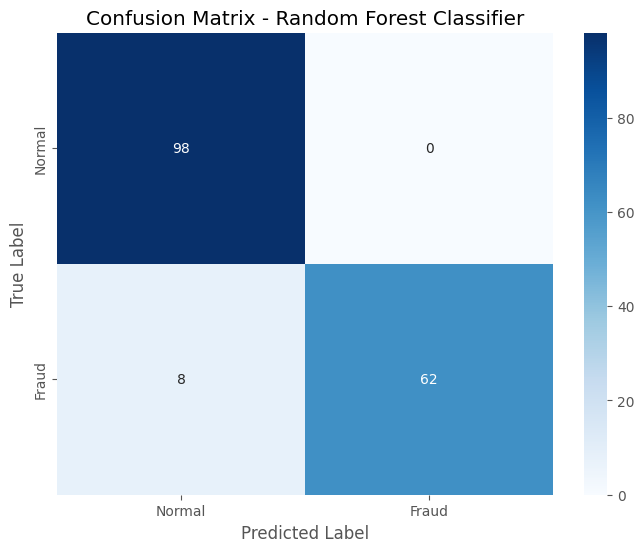


==========Decision Tree Classifier===========

 Accuaracy: 0.9404761904761905

 Precision: 0.9166666666666666

 Recall: 0.9428571428571428

 F1 Score: 0.9295774647887324


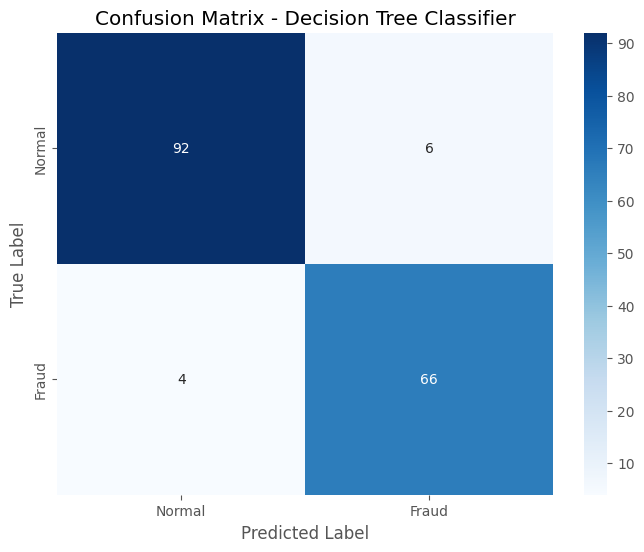

In [94]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")

    # Add confusion matrix
    plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix - {name}')

In [95]:
# OVERSAMPLING

In [96]:
X = data.drop('Class', axis = 1)
y= data['Class']

In [97]:
X.shape

(194205, 29)

In [98]:
y.shape

(194205,)

In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
X_res, y_res = SMOTE().fit_resample(X,y)


In [101]:
y_res.value_counts()

Class
0    193838
1    193838
Name: count, dtype: int64

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)


==========Logistic Regression===========

 Accuaracy: 0.9520222864217912

 Precision: 0.975366250678242

 Recall: 0.9274584666185121

 F1 Score: 0.950809266899397


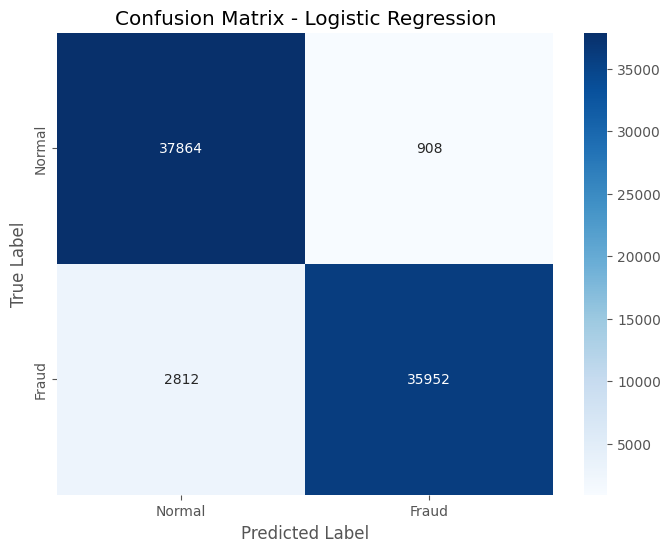


==========Random Forest Classifier===========

 Accuaracy: 0.99990971935617

 Precision: 0.9998194526837069

 Recall: 1.0

 F1 Score: 0.9999097181917843


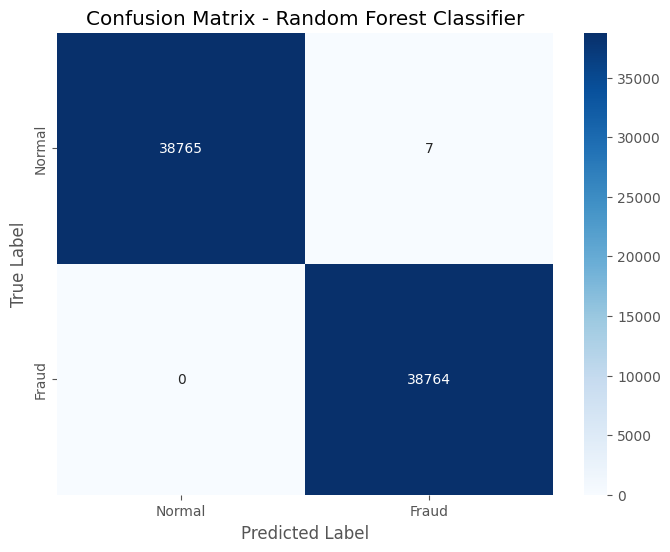


==========Decision Tree Classifier===========

 Accuaracy: 0.997910647957078

 Precision: 0.9970129268167071

 Recall: 0.9988133319574863

 F1 Score: 0.9979123173277662


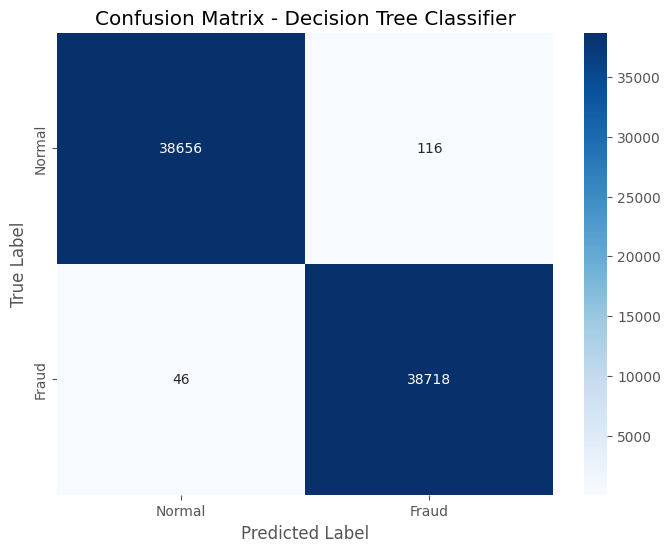

In [103]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuaracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred)}")
    print(f"\n Recall: {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred)}")

    # Add confusion matrix
    plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix - {name}')

In [104]:
dtc = DecisionTreeClassifier()
dtc.fit(X_res, y_res)

DecisionTreeClassifier()

In [105]:
import joblib

In [106]:
joblib.dump(dtc, "credit_card_model.pkl")


['credit_card_model.pkl']

In [107]:
model = joblib.load("credit_card_model.pkl")

In [108]:
pred = model.predict([[-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]])

/Users/aastikabanstola/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [109]:
pred[0]

np.int64(0)

In [110]:
if pred[0] == 0:
    print("Normal Transcation")
else:
    print("Fraud Transcation")

Normal Transcation


In [111]:
# Flask, Streamlit-> Homework